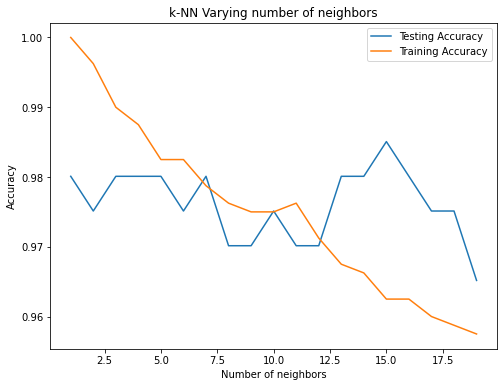

Accuracy on training data: 0.983
Accuracy on test data: 0.980
[[112   2   0]
 [  1  47   1]
 [  0   0  38]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.96      0.96      0.96        49
           2       0.97      1.00      0.99        38

    accuracy                           0.98       201
   macro avg       0.97      0.98      0.98       201
weighted avg       0.98      0.98      0.98       201



/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

n = 65532 #number of records in file
s = 1000 #desired sample size
skip = sorted(random.sample(range(n),n-s))
data = pd.read_csv('log2.csv',
                   names = ["Source Port","Destination Port","NAT Source Port","NAT Destination Port","Action","Bytes","Bytes Sent",
                            "Bytes Received","Packets","Elapsed Time (sec)","pkts_sent","pkts_received"] , skiprows=skip)

#data = pd.read_csv('log2.csv', names = ["Source Port","Destination Port","NAT Source Port","NAT Destination Port","Action","Bytes","Bytes Sent",
                            #"Bytes Received","Packets","Elapsed Time (sec)","pkts_sent","pkts_received"])

data.head(10)

data.shape

data.describe()

data.info()

data.isna().sum()

print(data['Action'].value_counts())
sns.countplot(x='Action',data=data)
plt.show()

a=[]
a=data.apply(lambda col:col.corr(data['Action'],method='spearman'),axis=0)
a=a.abs().sort_values(ascending=False)
a

fig.set_size_inches(25,30)

axs=axs.flatten()

for col, ax in zip(data.columns,axs):
  sns.countplot(x=col,hue='Action',data=data,ax=ax)

plt.tight_layout()

data["Action"]=data["Action"].astype("category").cat.codes
x1=data["Action"]
data.head(5)
x2 = data.drop('Action',axis=1)
x2.head(5)

#concatenating into one dataframe
x = pd.concat([x1,x2],axis=1)
x.head(5)

#correlation between attributes
corr=abs(x.corr())
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

target = ["Action"]
X = x.drop(target, axis=1)

target = x[target]
Y = pd.DataFrame(target)
Y = np.array(Y)

X.shape

Y.shape

from sklearn.decomposition import PCA

pca_test = PCA(n_components=11)

xtr = pca_test.fit_transform(X)

xtr.shape

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='g', linestyle = '--', x=2, ymin=0, ymax=1)
display(plt.show())

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

xtrain, xtest, ytrain, ytest = train_test_split(xtr,Y,test_size=0.2)

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
   #Setup a knn classifier with k neighbors
   knn = KNeighborsClassifier(n_neighbors=k)

   #Fit the model
   knn.fit(xtrain, ytrain.ravel())

   #Compute accuracy on the training set
   train_accuracy[i] = knn.score(xtrain, ytrain.ravel())

   #Compute accuracy on the test set
   test_accuracy[i] = knn.score(xtest, ytest.ravel())

#Generate plot
fig = plt.figure(1, figsize=(8,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label= 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label= 'Training Accuracy')
plt.legend(prop={'size':10})
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(xtrain, ytrain.ravel())


y_pred = classifier.predict(xtest)
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))


knn_acc = accuracy_score(ytest, y_pred)
knn_acc

#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model2 = gnb.fit(xtrain, ytrain)
prediction2 = model2.predict(xtest)

print('Accuracy on training data: {:,.3f}'.format(gnb.score(xtrain,ytrain)))
print('Accuracy on test data: {:,.3f}'.format(gnb.score(xtest,ytest)))

accuracy_score(ytest, prediction2)

print(confusion_matrix(ytest, prediction2))
print(classification_report(ytest, prediction2))

#classification using svm
from sklearn.svm import SVC

svc = SVC()

model3 = svc.fit(xtrain, ytrain)
prediction3 = model3.predict(xtest)

print("Accuracy on training data: {:,.3f}".format(svc.score(xtrain,ytrain)))
print("Accuracy on test data: {:,.3f}".format(svc.score(xtest, ytest)))

accuracy_score(ytest, prediction3)

print(confusion_matrix(ytest, prediction3))
print(classification_report(ytest, prediction3))


#Random Forst Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

model4 = rfc.fit(xtrain, ytrain)
prediction4 = model4.predict(xtest)

print('Accuracy on training data: {:,.3f}'.format(rfc.score(xtrain,ytrain)))
print('Accuracy on test data: {:,.3f}'.format(rfc.score(xtest,ytest)))

accuracy_score(ytest, prediction4)

print(confusion_matrix(ytest, prediction4))
print(classification_report(ytest, prediction4))

#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model5 = lr.fit(xtrain, ytrain)
prediction5 = model5.predict(xtest)

#print('Accuracy on training data: {:,.3f}'.format(lr.score(xtrain,ytrain)))
#print('Accuracy on test data: {:,.3f}'.format(lr.score(xtest,ytest)))

#accuracy_score(ytest, prediction5)

print(confusion_matrix(ytest, prediction5))
print(classification_report(ytest, prediction5))



